In [2]:
import pandas as pd
import pymysql
import sqlalchemy
import re

In [3]:
shark_attacks = pd.read_csv(r'C:/Users/HP/Desktop/datamex_082020/module-1/pandas-project/your-code/attacks.csv', engine = 'python', sep=',')

In [4]:
shark_attacks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
shark_attacks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [6]:
shark_attacks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [7]:
pd.isnull(shark_attacks).sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [8]:
shark_attacks.fillna('no record', inplace = True)
shark_attacks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303,no record,no record
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,no record,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302,no record,no record
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,no record,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301,no record,no record
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300,no record,no record
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299,no record,no record
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,no record,no record,no record,no record,no record,no record,no record,no record,no record,no record,...,no record,no record,no record,no record,no record,no record,no record,no record,no record,no record
25719,no record,no record,no record,no record,no record,no record,no record,no record,no record,no record,...,no record,no record,no record,no record,no record,no record,no record,no record,no record,no record
25720,no record,no record,no record,no record,no record,no record,no record,no record,no record,no record,...,no record,no record,no record,no record,no record,no record,no record,no record,no record,no record
25721,no record,no record,no record,no record,no record,no record,no record,no record,no record,no record,...,no record,no record,no record,no record,no record,no record,no record,no record,no record,no record


In [9]:
shark_attacks['Unnamed: 22'].value_counts()

no record       25722
stopped here        1
Name: Unnamed: 22, dtype: int64

In [10]:
shark_attacks['Unnamed: 23'].value_counts()

no record          25721
Teramo                 1
change filename        1
Name: Unnamed: 23, dtype: int64

In [11]:
shark_attacks.drop(shark_attacks.columns[shark_attacks.columns.str.contains('Unnamed: 22',case = False)],axis = 1, inplace = True)

In [12]:
shark_attacks.drop(shark_attacks.columns[shark_attacks.columns.str.contains('Unnamed: 23',case = False)],axis = 1, inplace = True)

In [13]:
shark_attacks['Date'].value_counts()

no record      19421
1957              11
1942               9
1956               8
1950               7
               ...  
17-Aug-1992        1
10-Feb-1975        1
Ca. 1970           1
04-May-2014        1
29-Mar-1975        1
Name: Date, Length: 5434, dtype: int64

In [14]:
shark_attacks['Year'].value_counts()

no record    19423
2015.0         143
2017.0         136
2016.0         130
2011.0         128
             ...  
1786.0           1
1785.0           1
1784.0           1
1783.0           1
1812.0           1
Name: Year, Length: 250, dtype: int64

In [15]:
shark_attacks.iloc[17]

Case Number                                                    2018.04.30.R
Date                                                   Reported 30-Apr-2018
Year                                                                   2018
Type                                                             Unprovoked
Country                                                            THAILAND
Area                                                                Hua Hin
Location                                                      Sai Noi Beach
Activity                                                           Swimming
Name                                                                 female
Sex                                                                       M
Age                                                               no record
Injury                                                Minor injury to ankle
Fatal (Y/N)                                                               N
Time        

In [16]:
shark_attacks['Date'] = shark_attacks['Date'].str.replace('Reported', '')

In [17]:
shark_attacks.iloc[17]

Case Number                                                    2018.04.30.R
Date                                                            30-Apr-2018
Year                                                                   2018
Type                                                             Unprovoked
Country                                                            THAILAND
Area                                                                Hua Hin
Location                                                      Sai Noi Beach
Activity                                                           Swimming
Name                                                                 female
Sex                                                                       M
Age                                                               no record
Injury                                                Minor injury to ankle
Fatal (Y/N)                                                               N
Time        

In [18]:
if 'Case Number.1' == 'Case Numeber.2':
    print('True for 1 an 2')
elif 'Case Number.1' == 'Case Number':
    print ('True for 1 and primary')
elif 'Case Number' == 'Case Number.2':
    print('True for primary and 2')
else:
    print(False)

False


In [19]:
shark_attacks['Case Number.1'].isin(shark_attacks['Case Number.2']).value_counts()

True     25704
False       19
Name: Case Number.1, dtype: int64

In [20]:
if 'href formula' == 'href':
    print(True)
else:
    print(False)

False


In [21]:
shark_attacks['href'].isin(shark_attacks['href formula']).value_counts()

True     25666
False       57
Name: href, dtype: int64

In [22]:
shark_attacks.loc[shark_attacks['href']!=(shark_attacks['href formula'])]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
50,2018.01.13,13-Jan-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Martin Islet,Free diving,Callum Stewart,M,...,N,no record,"White shark, 3.5 m","B. Myatt, GSAF",2018.01.13-Stewart.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.01.13,2018.01.13,6253
96,2017.08.29,29-Aug-2017,2017,Unprovoked,AUSTRALIA,Victoria,Cathedral Rock,Surfing,Marcel Brundler,M,...,N,10h30,"White shark, 3 m","B. Myatt, GSAF",2017.08.27-Brundler.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.08.29,2017.08.29,6207
131,2017.06.05,2017.06.05,2017,Unprovoked,FRENCH POLYNESIA,Marquesas,"Atuona Bay, Hiva Oa Island",Surfing,male,M,...,N,no record,no record,"Tahiti Infos, 6/6/2017",2017.06.05-FrenchPolynesia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.05,2017.06.05,6172
133,2017.06.11,11-Jun-2017,2017,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,Paul Goff,M,...,N,08h30,"White shark, 4 m","WA Today, 6/11/2017",2017.06.11-Goff.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.11,2017.06.11,6170
141,2017.05.27,27-May-2017,2017,Invalid,AUSTRALIA,New South Wales,Evans Head,Fishing,Terry Selwood,M,...,N,no record,no record,"B. Myatt, GSAF",2017.05.27-Selwood.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.05.27,2017.05.27,6162
168,2017.03.19,19-Mar-2017,2017,Unprovoked,AUSTRALIA,New South Wales,The Farm,Body boarding,Gonzalo Fernandez,M,...,N,18h30,no record,"Illawarra Mercury, 1/19/2017",2017.03.19-Fernandez.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.03.19,2017.03.19,6135
234,2016.07.29,29-Jul-2016,2016,Unprovoked,SPAIN,Alicante Province,Arenales del Sol,Swimming,male,M,...,N,11h30,Blue shark,"Informacion.es, 7/29/2016",2016.07.29-Spain.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.07.29,2016.07.29,6069
241,2016.07.23.a,23-Jul-2016,2016,Unprovoked,BAHAMAS,Abaco Islands,Green Turtle Cay,Spearfishing,Steve Cutbirth,M,...,N,no record,"Bull shark, 6'","KWTX, 7/23/2016",2016.07.23.a-Cutbirth.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.07.23.a,2016.07.23.a,6062
276,2016.05.21.a,21-May-2016,2016,Unprovoked,USA,Florida,"Hugenot Beach , Jacksonville, Duval County",Swimming,female,F,...,N,17h46,no record,"Action News Jax, 5/23/2016",2016.05.21.a-Girl.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.05.21.a,2016.05.21.a,6027
324,2015.12.21.a,21-Dec-2015,2015,Unprovoked,BRAZIL,Pernambuco,Fernano de Noronha,Scuba diving,Márcio de Castro Palma,M,...,N,no record,"Tiger shark, 1.5 m","Fox News, 12/22/2015",2015.12.21.a-Brazil.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.12.21.a,2015.12.21.a,5979


In [23]:
shark_attacks.loc[shark_attacks['Case Number']!=(shark_attacks['Case Number.1'])]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
34,2018.04.03,03-Apr-2018,2018,Unprovoked,SOUTH AFRICA,Eastern Cape Province,St. Francis Bay,Surfing,Ross Spowart,M,...,N,15h00,White shark,"K. McMurray, TrackingSharks.com",2018.04.03-StFrancisBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.02,2018.04.03,6269
117,2017.07.20.a,20-Jul-2017,2017,Unprovoked,USA,California,"Seal Rock, Goleta Beach, Santa Barbara",SUP,Rolf Geyling,M,...,N,07h45,"White shark, 8' to 10'","R. Collier, GSAF",2017.07.20.a-Geyling.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017/07.20.a,2017.07.20.a,6186
144,2017.05.06,05-May-2017,2017,Unprovoked,MEXICO,Baja California Sur,"Los Arbolitos, Cabo Pulmo",Snorkeling,Andres Rozada,M,...,Y,17h00,no record,J. Rozada,2017.05.06-Rozada.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.06,2017.05.06,6159
217,2016.09.15,16-Sep-2016,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,N,no record,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,6086
314,2016.01.24.b,24-Jan-2016,2016,Unprovoked,USA,Texas,Off Surfside,Spearfishing,Keith Love,M,...,N,09h30 / 10h00,Bull sharks x 2,K. Love,2016.01.24.b-Love.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.01.24.b,2016.01.24.b,5989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,0,no record,no record,no record,no record,no record,no record,no record,no record,no record,...,no record,no record,no record,no record,no record,no record,no record,no record,no record,no record
8699,0,no record,no record,no record,no record,no record,no record,no record,no record,no record,...,no record,no record,no record,no record,no record,no record,no record,no record,no record,no record
8700,0,no record,no record,no record,no record,no record,no record,no record,no record,no record,...,no record,no record,no record,no record,no record,no record,no record,no record,no record,no record
8701,0,no record,no record,no record,no record,no record,no record,no record,no record,no record,...,no record,no record,no record,no record,no record,no record,no record,no record,no record,no record


In [24]:
shark_attacks.loc[shark_attacks['Case Number']!=(shark_attacks['Case Number.2'])]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
390,2015.07-10,10-Jul-2015,2015,Unprovoked,USA,California,"Huntington Beach, Orange County",Surfing,Danny Miskin,M,...,N,08h45,"White shark, 7'","KTLA, 7/10/2015",2015.07.10-Miskin.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.07.10,2015.07.10,5913
4949,1934.01.08.R,08-Feb-1934,1934,Boating,TURKEY,Istanbul,"Haydarpasa jetty, Istanbul",Fishing,2 males,M,...,N,no record,no record,"C. Moore, GSAF",1924.02.08.R-Turkey.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1934.02.08.R,1934.02.08.R,1354
5488,no record,06-Sep-1905,1905,Provoked,USA,Florida,"Fort Pierce, St Lucie County",Fishing,David Curry,M,...,N,no record,no record,"Muncie Evening Press, 8/6/1913",1905.09.06.R-Curry.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.09.06.R,1905.09.06.R,815
5944,1864.05,May-1864,1864,Unprovoked,MAURITIUS,300 miles east of Mauritius,no record,Fell overboard,male from the whaler Albatross,M,...,Y,no record,no record,"North Adams Transcript, 3/18/1898",1864.05.00.Mauritius.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1864.05.00,1864.05.00,359
6302,0,no record,no record,no record,no record,no record,no record,no record,no record,no record,...,no record,no record,no record,no record,no record,no record,no record,no record,no record,6304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,0,no record,no record,no record,no record,no record,no record,no record,no record,no record,...,no record,no record,no record,no record,no record,no record,no record,no record,no record,no record
8699,0,no record,no record,no record,no record,no record,no record,no record,no record,no record,...,no record,no record,no record,no record,no record,no record,no record,no record,no record,no record
8700,0,no record,no record,no record,no record,no record,no record,no record,no record,no record,...,no record,no record,no record,no record,no record,no record,no record,no record,no record,no record
8701,0,no record,no record,no record,no record,no record,no record,no record,no record,no record,...,no record,no record,no record,no record,no record,no record,no record,no record,no record,no record


In [25]:
shark_attacks.loc[shark_attacks['Case Number.1']!=(shark_attacks['Case Number.2'])]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
34,2018.04.03,03-Apr-2018,2018,Unprovoked,SOUTH AFRICA,Eastern Cape Province,St. Francis Bay,Surfing,Ross Spowart,M,...,N,15h00,White shark,"K. McMurray, TrackingSharks.com",2018.04.03-StFrancisBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.02,2018.04.03,6269
117,2017.07.20.a,20-Jul-2017,2017,Unprovoked,USA,California,"Seal Rock, Goleta Beach, Santa Barbara",SUP,Rolf Geyling,M,...,N,07h45,"White shark, 8' to 10'","R. Collier, GSAF",2017.07.20.a-Geyling.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017/07.20.a,2017.07.20.a,6186
144,2017.05.06,05-May-2017,2017,Unprovoked,MEXICO,Baja California Sur,"Los Arbolitos, Cabo Pulmo",Snorkeling,Andres Rozada,M,...,Y,17h00,no record,J. Rozada,2017.05.06-Rozada.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.06,2017.05.06,6159
217,2016.09.15,16-Sep-2016,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,N,no record,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,6086
314,2016.01.24.b,24-Jan-2016,2016,Unprovoked,USA,Texas,Off Surfside,Spearfishing,Keith Love,M,...,N,09h30 / 10h00,Bull sharks x 2,K. Love,2016.01.24.b-Love.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.01.24.b,2016.01.24.b,5989
334,2015.12.23,07-Nov-2015,2015,Invalid,USA,Florida,"Paradise Beach, Melbourne, Brevard County",Surfing,Ryla Underwood,F,...,no record,11h00,Shark involvement not confirmed,"Fox25Orlando, 11/7/2015",2015.11.07-Underwood.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.11.07,2015.12.23,5969
339,2015.10.28.a,28-Oct-2015,2015,Unprovoked,USA,Hawaii,"Malaka, Oahu",Body boarding,Raymond Senensi,M,...,N,14h50,no record,"Star Advertiser, 10/28/2015",2015.10.28-Senensi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.10.28,2015.10.28.a,5964
560,2014.05.04,04-May-2014,2014,Unprovoked,SOUTH AFRICA,Western Cape Province,Simonstown,Diving,no record,no record,...,N,no record,Cow shark,"Sunday Times, 5/5/2014",2015.05.04-CowShark.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2013.05.04,2014.05.04,5743
3522,1967.07.05,05-Jul-1967,1967,Unprovoked,TURKEY,Mugla Province,Kucukada Island,Spearfishing,Gungor Guven,M,...,Y,13h40,no record,"C. Moore, GSAF",1967.07.05-Guven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1967/07.05,1967.07.05,2781
3795,"1962,08.30.b",30-Aug-1962,1962,Boat,TURKEY,Antalya Province,Ucagiz,no record,Occupant: Hasan Olta,M,...,N,no record,no record,"C.Moore, GSAF",1962.08.30.b-pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1962.08.30.b,"1962,08.30.b",2508


In [26]:
shark_attacks['Case Number'] = shark_attacks['Case Number'].str.replace('\+|a|b|\-|A|B', '')

In [27]:
shark_attacks['Case Number'].value_counts()

no record      17021
0               2400
1920.00.00.        3
1962.06.11.        3
1923.00.00.        3
               ...  
1968.03.10         1
1995.02.19         1
2016.05.22         1
1979.08.26         1
2006.07.13         1
Name: Case Number, Length: 5679, dtype: int64

In [28]:
shark_attacks['Case Number.1'] = shark_attacks['Case Number.1'].str.replace('\+|a|b|\-|A|B', '')

In [29]:
shark_attacks['Case Number.2'] = shark_attacks['Case Number.2'].str.replace('\+|a|b|\-|A|B', '')

In [30]:
shark_attacks['Country'] = shark_attacks['Country'].str.upper()

In [31]:
shark_attacks['Country'].value_counts()

NO RECORD                    19471
USA                           2229
AUSTRALIA                     1338
SOUTH AFRICA                   579
PAPUA NEW GUINEA               134
                             ...  
SOLOMON ISLANDS / VANUATU        1
COOK ISLANDS                     1
IRELAND                          1
PUERTO RICO                      1
NORTHERN MARIANA ISLANDS         1
Name: Country, Length: 210, dtype: int64

In [32]:
shark_attacks['Country'] = shark_attacks['Country'].str.replace('\?|CEYLON|(|)', '')

In [33]:
shark_attacks['Country'].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', 'NO RECORD', 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, BRITISH OVERSEAS TERRITORY', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'FIJI', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'PUERTO RICO', 'ITALY',
       'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 'UNITE

In [34]:
set(shark_attacks['Fatal (Y/N)'])

{' N', '2017', 'M', 'N', 'N ', 'UNKNOWN', 'Y', 'no record', 'y'}

In [35]:
shark_attacks['Fatal (Y/N)'] = shark_attacks['Fatal (Y/N)'].str.replace('\+|2017|M', '')

In [36]:
set(shark_attacks['Fatal (Y/N)'])

{'', ' N', 'N', 'N ', 'UNKNOWN', 'Y', 'no record', 'y'}

In [37]:
shark_attacks['Fatal (Y/N)'] = shark_attacks['Fatal (Y/N)'].str.upper()

In [38]:
set(shark_attacks['Fatal (Y/N)'])

{'', ' N', 'N', 'N ', 'NO RECORD', 'UNKNOWN', 'Y'}

In [39]:
shark_attacks['Name'] = shark_attacks['Name'].str.upper()

In [40]:
shark_attacks['Name'] = shark_attacks['Name'].str.replace('\+|MALE|FEMALE', '')

In [41]:
set(shark_attacks['Name'])

{'',
 '5 M ALUMINUM DINGHY - OCCUPANTS MR. & MRS. PAUL VICKERY',
 'COLIN GRANT ',
 'A PORTUGUESE SOLDIER',
 'DENNIS WASHINGTON',
 'JORGE ALVAREZ',
 'ROB BENNETT',
 'MRS. G. RAUTENBACH',
 'HISAO SHIMOTO',
 'DIMITRIS PARASSAKIS ',
 'CAPTAIN SANNA',
 'SHAWN HAMILTON',
 '5 PEOPLE SWIMMING FOR SHORE (PILOT & 4 PASSENGERS)',
 'J.H. SEDDON',
 'JÚLIO CÉSAR DE BARROS CORREIA',
 'OCCUPANT: GRANT WARDELL',
 'PATTERSON (JOHN) NIKUNIKO',
 'JOHN DABBS',
 'CARLO ALBERTO BRASILEIRO',
 'HENRI BOURCE',
 'MIKE SPRAGUE',
 'APY',
 "UNKNOWN, HE WAS NABETARI'S COMPANION",
 'MATTHEW ROBERTSON PAUL',
 'ANDREW CRIBB',
 'A SAMOAN BOY',
 'KENNON CAHILL',
 'GILES GORDON',
 'ALBERTO CARAVALLO SANTOS',
 'LAURENT MANUIREVA',
 'SAM MCLAIN',
 'MRS. DESPO SNOW-CHRISTENSEN ',
 'RICK WELCH',
 'THEODORE C. SWIENTY',
 'JEI TURRELL',
 'A. ROBSON',
 'CARL LAFAZIO',
 'GIANLUCA FERRARIO ',
 'DOUG PERRINE',
 'PRESTON D. SOLEY',
 'GEOFFREY ZIMMERMAN',
 'CARL NAKUINA',
 'JOHN CAMPBELL',
 'JIM BROACH',
 'NICK ANTHONY',
 'US NAVAL S

In [42]:
shark_attacks['Name'] = shark_attacks['Name'].str.replace('\+|BOAT|PEOPLE', '')

In [43]:
shark_attacks['Sex '] = shark_attacks['Sex '].str.upper()

In [44]:
shark_attacks.rename(columns={'Sex ': 'Sex'}, inplace=True)

In [45]:
set(shark_attacks['Sex'])

{'.', 'F', 'LLI', 'M', 'M ', 'N', 'NO RECORD'}

In [46]:
shark_attacks['Sex'] = shark_attacks['Sex'].str.replace('\+|LLI|N|O|RECRD', '')

In [47]:
set(shark_attacks['Sex'])

{'', ' RECRD', '.', 'F', 'M', 'M '}

In [48]:
shark_attacks['Sex'] = shark_attacks['Sex'].str.replace('M ', 'M')

In [49]:
set(shark_attacks['Sex'])

{'', ' RECRD', '.', 'F', 'M'}

In [50]:
shark_attacks['Sex'] = shark_attacks['Sex'].str.replace('.', 'UNKNOWN')

In [51]:
set(shark_attacks['Sex'])

{'', ' RECRD', 'F', 'M', 'UNKNOWN'}

In [52]:
shark_attacks['Sex'] = shark_attacks['Sex'].str.replace('RECRD', 'UNKNOWN')

In [53]:
set(shark_attacks['Sex'])

{'', ' UNKNOWN', 'F', 'M', 'UNKNOWN'}

In [54]:
shark_attacks['Sex'] = shark_attacks['Sex'].str.replace(' UNKNOWN', 'UNKNOWN')

In [55]:
set(shark_attacks['Sex'])

{'', 'F', 'M', 'UNKNOWN'}

In [56]:
shark_attacks['Country'] = shark_attacks['Country'].str.replace('MEXICO ', 'MEXICO')

In [57]:
shark_attacks['Activity'].unique()

array(['Paddling', 'Standing', 'Surfing', ...,
       'Crew swimming alongside their anchored ship',
       '4 men were bathing', 'Wreck of  large double sailing canoe'],
      dtype=object)

In [58]:
shark_attacks['Activity'] = shark_attacks['Activity'].str.upper()

In [59]:
shark_attacks['Activity'] = shark_attacks['Activity'].str.replace('Crew swimming alongside their anchored ship', 'SWIMMING')

In [60]:
shark_attacks['Activity'].unique()

array(['PADDLING', 'STANDING', 'SURFING', ...,
       'CREW SWIMMING ALONGSIDE THEIR ANCHORED SHIP',
       '4 MEN WERE BATHING', 'WRECK OF  LARGE DOUBLE SAILING CANOE'],
      dtype=object)

In [61]:
shark_attacks['Activity'] = shark_attacks['Activity'].str.replace('CREW SWIMMING ALONGSIDE THEIR ANCHORED SHIP', 'SWIMMING')

In [62]:
shark_attacks['Activity'].unique()

array(['PADDLING', 'STANDING', 'SURFING', ...,
       'SWIMMING AROUND ANCHORED SHIP', '4 MEN WERE BATHING',
       'WRECK OF  LARGE DOUBLE SAILING CANOE'], dtype=object)

In [63]:
shark_attacks['Activity'] = shark_attacks['Activity'].str.replace('SWIMMING IN POOL FORMED BY CONSTRUCTION OF A WHARF', 'SWIMMING')

In [64]:
shark_attacks['Activity'].unique()

array(['PADDLING', 'STANDING', 'SURFING', ...,
       'SWIMMING AROUND ANCHORED SHIP', '4 MEN WERE BATHING',
       'WRECK OF  LARGE DOUBLE SAILING CANOE'], dtype=object)

In [65]:
shark_attacks['Activity'] = shark_attacks['Activity'].str.replace('SWIMMING AROUND ANCHORED SHIP', 'SWIMMING')

In [66]:
shark_attacks['Activity'].unique()

array(['PADDLING', 'STANDING', 'SURFING', ..., 'WOODEN FISHING BOAT',
       '4 MEN WERE BATHING', 'WRECK OF  LARGE DOUBLE SAILING CANOE'],
      dtype=object)

In [67]:
shark_attacks['Type'].unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', 'no record', 'Boat', 'Boatomg'], dtype=object)

In [68]:
shark_attacks['Type'] = shark_attacks['Type'].str.upper()

In [69]:
shark_attacks['Type'].unique()

array(['BOATING', 'UNPROVOKED', 'INVALID', 'PROVOKED', 'QUESTIONABLE',
       'SEA DISASTER', 'NO RECORD', 'BOAT', 'BOATOMG'], dtype=object)

In [70]:
shark_attacks['Type'] = shark_attacks['Type'].str.replace('BOATING', 'UNKNOWN')

In [71]:
shark_attacks['Type'] = shark_attacks['Type'].str.replace('BOAT', 'UNKNOWN')

In [72]:
shark_attacks['Type'] = shark_attacks['Type'].str.replace('BOATOMG', 'UNKNOWN')

In [73]:
shark_attacks['Type'].unique()

array(['UNKNOWN', 'UNPROVOKED', 'INVALID', 'PROVOKED', 'QUESTIONABLE',
       'SEA DISASTER', 'NO RECORD', 'UNKNOWNOMG'], dtype=object)

In [74]:
shark_attacks['Type'] = shark_attacks['Type'].str.replace('UNKNOWNOMG', 'UNKNOWN')

In [75]:
shark_attacks['Type'].unique()

array(['UNKNOWN', 'UNPROVOKED', 'INVALID', 'PROVOKED', 'QUESTIONABLE',
       'SEA DISASTER', 'NO RECORD'], dtype=object)

In [76]:
shark_attacks['Type'] = shark_attacks['Type'].str.replace('INVALID', 'UNKNOWN')

In [77]:
shark_attacks['Type'] = shark_attacks['Type'].str.replace('QUESTIONABLE', 'UNKNOWN')

In [78]:
shark_attacks['Type'] = shark_attacks['Type'].str.replace('SEA DISASTER', 'UNKNOWN')

In [79]:
shark_attacks['Type'].unique()

array(['UNKNOWN', 'UNPROVOKED', 'PROVOKED', 'NO RECORD'], dtype=object)

In [81]:
shark_attacks['Species '].unique()

array(['White shark', 'no record', '2 m shark', ..., "12' tiger shark",
       'Blue pointers',
       'Said to involve a grey nurse shark that leapt out of the water and  seized the boy but species identification is questionable'],
      dtype=object)

In [82]:
shark_attacks.rename(columns={'Species ': 'Species'}, inplace=True)

In [84]:
import matplotlib.pyplot as plt

In [90]:
shark_attacks['Sex'] = shark_attacks['Sex'].astype('str')

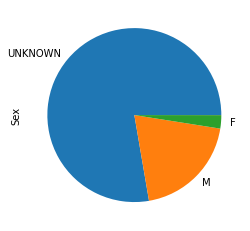

In [91]:
shark_attacks['Sex'].value_counts().plot(kind = 'pie')

In [92]:
shark_attacks = shark_attacks.to_csv('C:/Users/HP/Desktop/datamex_082020/module-1/pandas-project/your-code/shark_attacks.csv', index=False)